In [1]:
import scanpy as sc
import pandas as pd 
import numpy as np
import anndata as ad
import re
import scipy.sparse as scs
import concurrent.futures
import scanpy.external as sce
from concurrent.futures import ProcessPoolExecutor
import copy
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import warnings
from matplotlib.lines import Line2D
from matplotlib import cm
import math
from pathlib import Path
import scipy
from scipy.stats import zscore
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

# Suppress all warnings
warnings.filterwarnings('ignore')
import math
import decoupler as dc

In [2]:
pip install decoupler

  Obtaining dependency information for decoupler from https://files.pythonhosted.org/packages/31/16/2804856d500b8ed683e9dadbba002f32eee284c5b2429256785f7de3478a/decoupler-1.6.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## File load

In [5]:
# Load the metadata
meta_data=pd.read_csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks/Qiuyu-Notebooks/scRNA/hise_meta_data_2024-01-23_fixed.csv')
meta_data=meta_data[meta_data['Covid_exlcusion']=='no']
TimePoints=['Flu Year 1 Day 0']
meta_data_subset=meta_data[meta_data['sample.visitName'].isin(TimePoints)]

In [6]:
from tqdm import tqdm
h5_list = []
for i in tqdm(range(len(meta_data_subset["pbmc_sample_id"].tolist()))):
    try:
        result = sc.read_h5ad("/home/jupyter/BRI_Analysis/h5_cleaned_by_sample/"+meta_data_subset["pbmc_sample_id"].tolist()[i]+'.h5ad')
        h5_list.append(result)
        print()
    except Exception as e:
        print(f'Error reading {file_name}: {e}')

  1% 1/92 [00:00<00:26,  3.49it/s]

  2% 2/92 [00:00<00:25,  3.60it/s]

  3% 3/92 [00:00<00:24,  3.61it/s]

  4% 4/92 [00:01<00:25,  3.52it/s]

  5% 5/92 [00:01<00:25,  3.37it/s]

  7% 6/92 [00:01<00:25,  3.34it/s]

  8% 7/92 [00:02<00:25,  3.40it/s]

  9% 8/92 [00:02<00:24,  3.38it/s]

 10% 9/92 [00:02<00:24,  3.41it/s]

 11% 10/92 [00:02<00:23,  3.42it/s]

 12% 11/92 [00:03<00:23,  3.47it/s]

 13% 12/92 [00:03<00:23,  3.43it/s]

 14% 13/92 [00:03<00:22,  3.46it/s]

 15% 14/92 [00:04<00:21,  3.58it/s]

 16% 15/92 [00:04<00:22,  3.39it/s]

 17% 16/92 [00:04<00:22,  3.36it/s]

 18% 17/92 [00:04<00:22,  3.31it/s]

 20% 18/92 [00:05<00:22,  3.29it/s]

 21% 19/92 [00:05<00:20,  3.53it/s]

 22% 20/92 [00:05<00:19,  3.67it/s]

 23% 21/92 [00:06<00:19,  3.63it/s]

 24% 22/92 [00:06<00:21,  3.21it/s]

 25% 23/92 [00:06<00:22,  3.00it/s]

 26% 24/92 [00:07<00:21,  3.10it/s]

 27% 25/92 [00:07<00:22,  3.04it/s]

 28% 26/92 [00:07<00:22,  2.91it/s]

 29% 27/92 [00:08<00:21,  3.03it/s]

 30% 28/92 [00:08<00:21,  2.95it/s]

 32% 29/92 [00:08<00:20,  3.09it/s]

 33% 30/92 [00:09<00:19,  3.12it/s]

 34% 31/92 [00:09<00:19,  3.16it/s]

 35% 32/92 [00:09<00:20,  3.00it/s]

 36% 33/92 [00:10<00:19,  3.07it/s]

 37% 34/92 [00:10<00:18,  3.15it/s]

 38% 35/92 [00:10<00:18,  3.04it/s]

 39% 36/92 [00:10<00:17,  3.28it/s]

 40% 37/92 [00:11<00:17,  3.23it/s]

 41% 38/92 [00:11<00:15,  3.38it/s]

 42% 39/92 [00:11<00:15,  3.41it/s]

 43% 40/92 [00:12<00:15,  3.37it/s]

 45% 41/92 [00:12<00:14,  3.44it/s]

 46% 42/92 [00:12<00:13,  3.77it/s]

 47% 43/92 [00:12<00:13,  3.51it/s]

 48% 44/92 [00:13<00:12,  3.74it/s]

 49% 45/92 [00:13<00:12,  3.72it/s]

 50% 46/92 [00:13<00:12,  3.76it/s]

 51% 47/92 [00:14<00:11,  3.77it/s]

 52% 48/92 [00:14<00:12,  3.48it/s]

 53% 49/92 [00:14<00:12,  3.47it/s]

 54% 50/92 [00:14<00:12,  3.44it/s]

 55% 51/92 [00:15<00:12,  3.39it/s]

 57% 52/92 [00:15<00:12,  3.29it/s]

 58% 53/92 [00:15<00:11,  3.29it/s]

 59% 54/92 [00:16<00:11,  3.34it/s]

 60% 55/92 [00:16<00:11,  3.27it/s]

 61% 56/92 [00:16<00:11,  3.13it/s]

 62% 57/92 [00:17<00:11,  2.94it/s]

 63% 58/92 [00:17<00:11,  3.02it/s]

 64% 59/92 [00:17<00:10,  3.26it/s]

 65% 60/92 [00:18<00:09,  3.23it/s]

 66% 61/92 [00:18<00:09,  3.28it/s]

 67% 62/92 [00:18<00:09,  3.20it/s]

 68% 63/92 [00:19<00:09,  3.21it/s]

 70% 64/92 [00:19<00:08,  3.17it/s]

 71% 65/92 [00:19<00:08,  3.16it/s]

 72% 66/92 [00:19<00:08,  3.23it/s]

 73% 67/92 [00:20<00:07,  3.31it/s]

 74% 68/92 [00:20<00:07,  3.32it/s]

 75% 69/92 [00:20<00:07,  3.15it/s]

 76% 70/92 [00:21<00:07,  3.01it/s]

 77% 71/92 [00:21<00:06,  3.26it/s]

 78% 72/92 [00:21<00:05,  3.48it/s]

 79% 73/92 [00:22<00:05,  3.42it/s]

 80% 74/92 [00:22<00:05,  3.40it/s]

 82% 75/92 [00:22<00:04,  3.57it/s]

 83% 76/92 [00:22<00:04,  3.72it/s]

 84% 77/92 [00:23<00:04,  3.56it/s]

 85% 78/92 [00:23<00:04,  3.45it/s]

 86% 79/92 [00:23<00:03,  3.39it/s]

 87% 80/92 [00:24<00:03,  3.35it/s]

 88% 81/92 [00:24<00:03,  3.28it/s]

 89% 82/92 [00:24<00:03,  3.21it/s]

 90% 83/92 [00:25<00:02,  3.18it/s]

 91% 84/92 [00:25<00:02,  3.29it/s]

 92% 85/92 [00:25<00:02,  3.20it/s]

 93% 86/92 [00:25<00:01,  3.27it/s]

 95% 87/92 [00:26<00:01,  3.46it/s]

 96% 88/92 [00:26<00:01,  3.44it/s]

 97% 89/92 [00:26<00:00,  3.76it/s]

 98% 90/92 [00:26<00:00,  3.68it/s]

 99% 91/92 [00:27<00:00,  3.50it/s]

100% 92/92 [00:27<00:00,  3.33it/s]

In [7]:
%%time
combined= ad.concat(h5_list)

CPU times: user 1min 23s, sys: 12.5 s, total: 1min 36s
Wall time: 1min 37s


In [8]:
combined


AnnData object with n_obs × n_vars = 1542995 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted_doublet', 'doublet_score', 'AIFI_L1', 'AIFI_L2', 'AIFI_L3', 'AIFI_L3.5', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito'

In [9]:
#subset on L3 B cells
mono_cells = combined[combined.obs['AIFI_L3'].isin(['Core CD14 monocyte','ISG+ CD14 monocyte','IL1B+ CD14 monocyte','Intermediate monocyte','Core CD16 monocyte','ISG+ CD16 monocyte','C1Q+ CD16 monocyte'])]


In [11]:
mono_cells

View of AnnData object with n_obs × n_vars = 301198 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted_doublet', 'doublet_score', 'AIFI_L1', 'AIFI_L2', 'AIFI_L3', 'AIFI_L3.5', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito'

In [12]:
%%time
mono_cells.write_h5ad('/home/jupyter/Myeloid_cells/files/Monocytes_only_FluYr1D0_PathwayAnalysis.h5ad')

CPU times: user 7.85 s, sys: 5.74 s, total: 13.6 s
Wall time: 13.6 s


# Load monocyte object

In [15]:
%%time
mono_df =sc.read_h5ad('/home/jupyter/Myeloid_cells/files/Monocytes_only_FluYr1D0_PathwayAnalysis.h5ad')

CPU times: user 1.77 s, sys: 2.87 s, total: 4.64 s
Wall time: 4.67 s


In [16]:
mono_df

AnnData object with n_obs × n_vars = 301198 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted_doublet', 'doublet_score', 'AIFI_L1', 'AIFI_L2', 'AIFI_L3', 'AIFI_L3.5', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito'

In [17]:
meta=pd.read_csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks/Qiuyu-Notebooks/scRNA/hise_meta_data_2024-01-23_fixed.csv')

In [18]:
%%time
# store raw data in .X
#B_cell_flu.X = np.round(B_cell_flu).astype(np.int_)
mono_df.layers['counts'] = mono_df.X

CPU times: user 57 µs, sys: 12 µs, total: 69 µs
Wall time: 78.2 µs


In [19]:
%%time
#make pseudobulk for each, based on L3 and pbmc_sampleID
pdata = dc.get_pseudobulk(
    mono_df,
    sample_col='pbmc_sample_id',
    groups_col='AIFI_L3',
    layer='counts',
    mode='sum',
    min_cells= 5,
    min_counts= 0
)
pdata

CPU times: user 38.4 s, sys: 30.8 s, total: 1min 9s
Wall time: 1min 11s


AnnData object with n_obs × n_vars = 628 × 26503
    obs: 'batch_id', 'hto_barcode', 'hto_category', 'pbmc_sample_id', 'pool_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted_doublet', 'AIFI_L3', 'psbulk_n_cells', 'psbulk_counts'
    layers: 'psbulk_props'

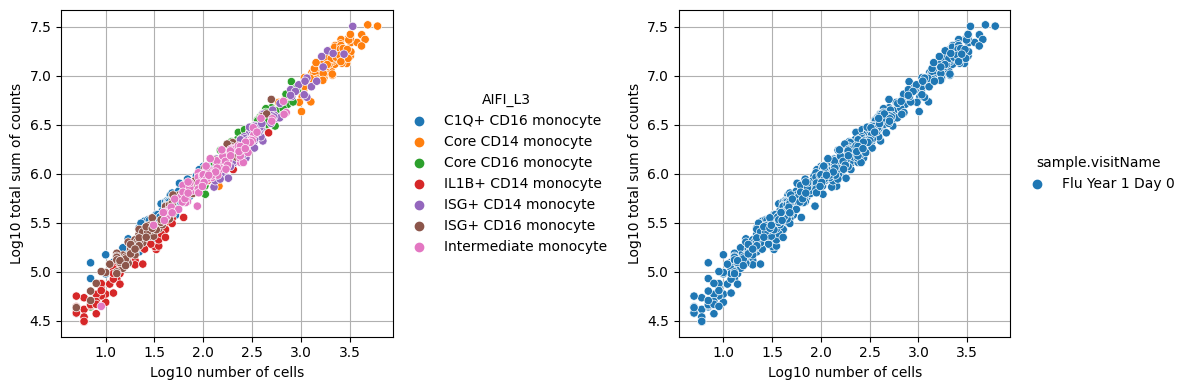

In [20]:
dc.plot_psbulk_samples(pdata, groupby=['AIFI_L3', 'sample.visitName'], figsize=(12, 4))

In [22]:
pdata.obs['subject.birthYear'] = pdata.obs['subject.birthYear'].astype(str)
pdata.obs['predicted_doublet'] = pdata.obs['predicted_doublet'].astype(str)


In [23]:
%%time
#write the psb data so that can use with limma in R
pdata.write('/home/jupyter/Myeloid_cells/files/Monocytes_only_FluYr1D0_PathwayAnalysis_psb.h5ad')

CPU times: user 65.4 ms, sys: 128 ms, total: 194 ms
Wall time: 193 ms


# create subset specific psb

In [24]:
psb_object = sc.read('/home/jupyter/Myeloid_cells/files/Monocytes_only_FluYr1D0_PathwayAnalysis_psb.h5ad')

In [25]:
psb_object.X = psb_object.X.astype(np.int_)

In [26]:
psb_object

AnnData object with n_obs × n_vars = 628 × 26503
    obs: 'batch_id', 'hto_barcode', 'hto_category', 'pbmc_sample_id', 'pool_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted_doublet', 'AIFI_L3', 'psbulk_n_cells', 'psbulk_counts'
    layers: 'psbulk_props'

In [27]:
%%time
dir_path = '/home/jupyter/IH-A-Aging-Analysis-Notebooks/Mansi_Notebooks/scRNA/Pathway_analysis/psb_subsets'
unique_values = psb_object.obs['AIFI_L3'].unique()

for category in unique_values:
    subset = psb_object[psb_object.obs['AIFI_L3'] == category].copy()
    genes = dc.filter_by_expr(subset, group='AIFI_L3', min_count=5, min_prop=0.1)
    filtered_subset = subset[:, genes].copy()
    filtered_subset.obs = filtered_subset.obs.astype(str)
    filtered_subset.var = filtered_subset.var.astype(str)
    print(f'Category: {category}, Shape: {filtered_subset.shape}')
    subset_filename = os.path.join(dir_path, f'subset_{category}.h5ad')
    filtered_subset.write_h5ad(subset_filename)

Category: C1Q+ CD16 monocyte, Shape: (90, 7077)
Category: Core CD14 monocyte, Shape: (92, 14160)
Category: Core CD16 monocyte, Shape: (92, 10968)
Category: IL1B+ CD14 monocyte, Shape: (80, 4449)
Category: ISG+ CD14 monocyte, Shape: (92, 11038)
Category: ISG+ CD16 monocyte, Shape: (90, 6009)
Category: Intermediate monocyte, Shape: (92, 9633)
CPU times: user 808 ms, sys: 89.5 ms, total: 897 ms
Wall time: 895 ms
